In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jane-street-real-time-market-data-forecasting/responders.csv
/kaggle/input/jane-street-real-time-market-data-forecasting/sample_submission.csv
/kaggle/input/jane-street-real-time-market-data-forecasting/features.csv
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=4/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=5/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=6/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=3/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=1/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=8/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=2/part-0.parquet
/kaggle/input/jane-street-real-time-market

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv, pd.read_parquet )
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

import os, gc

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

import kaggle_evaluation.jane_street_inference_server

In [3]:


path = '/kaggle/input/jane-street-real-time-market-data-forecasting/'
os.listdir(path)



['responders.csv',
 'sample_submission.csv',
 'features.csv',
 'train.parquet',
 'lags.parquet',
 'test.parquet',
 'kaggle_evaluation']

In [4]:

df = pl.read_parquet(
    '/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet',
    n_rows=100000  # just the first 100k rows
)

print(df.shape)
print(df.columns)
df.head()

(100000, 93)
['date_id', 'time_id', 'symbol_id', 'weight', 'feature_00', 'feature_01', 'feature_02', 'feature_03', 'feature_04', 'feature_05', 'feature_06', 'feature_07', 'feature_08', 'feature_09', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'fe

date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,…,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,partition_id
i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i8,i8,i16,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i64
0,0,1,3.889038,null,null,null,null,null,0.851033,0.242971,0.2634,-0.891687,11,7,76,-0.883028,0.003067,-0.744703,null,-0.169586,null,-1.335938,-1.707803,0.91013,null,1.636431,1.522133,-1.551398,-0.229627,null,null,1.378301,-0.283712,0.123196,null,null,…,null,null,-0.808103,null,-2.037683,0.727661,null,-0.989118,-0.345213,-1.36224,null,null,null,null,null,-1.251104,-0.110252,-0.491157,-1.02269,0.152241,-0.659864,null,null,-0.261412,-0.211486,-0.335556,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504,0
0,0,7,1.370613,null,null,null,null,null,0.676961,0.151984,0.192465,-0.521729,11,7,76,-0.865307,-0.225629,-0.582163,null,0.317467,null,-1.250016,-1.682929,1.412757,null,0.520378,0.744132,-0.788658,0.641776,null,null,0.2272,0.580907,1.128879,null,null,…,null,null,-1.625862,null,-1.410017,1.063013,null,0.888355,0.467994,-1.36224,null,null,null,null,null,-1.065759,0.013322,-0.592855,-1.052685,-0.393726,-0.741603,null,null,-0.281207,-0.182894,-0.245565,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.0,0.703665,0.216683,0.778639,0
0,0,9,2.285698,null,null,null,null,null,1.056285,0.187227,0.249901,-0.77305,11,7,76,-0.675719,-0.199404,-0.586798,null,-0.814909,null,-1.296782,-2.040234,0.639589,null,1.597359,0.657514,-1.350148,0.364215,null,null,-0.017751,-0.317361,-0.122379,null,null,…,null,null,-0.72542,null,-2.29417,1.764551,null,-0.120789,-0.063458,-1.36224,null,null,null,null,null,-0.882604,-0.072482,-0.617934,-0.86323,-0.241892,-0.709919,null,null,0.377131,0.300724,-0.106842,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828,0
0,0,10,0.690606,null,null,null,null,null,1.139366,0.273328,0.306549,-1.262223,42,5,150,-0.694008,3.004091,0.114809,null,-0.251882,null,-1.902009,-0.979447,0.241165,null,-0.392359,-0.224699,-2.129397,-0.855287,null,null,0.404142,-0.578156,0.105702,null,null,…,null,null,1.313203,null,-0.810125,2.939022,null,3.988801,1.834661,-1.36224,null,null,null,null,null,-0.697595,1.074309,-0.206929,-0.530602,4.765215,0.571554,null,null,-0.226891,-0.251412,-0.215522,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516,0
0,0,14,0.44057,null,null,null,null,null,0.9552,0.262404,0.344457,-0.613813,44,3,16,-0.947351,-0.030018,-0.502379,null,0.646086,null,-1.844685,-1.58656,-0.182024,null,-0.969949,-0.673813,-1.282132,-1.399894,null,null,0.043815,-0.320225,-0.031713,null,null,…,null,null,0.476195,null,-0.771732,2.843421,null,1.379815,0.411827,-1.36224,null,null,null,null,null,-0.948601,-0.136814,-0.447704,-1.141761,0.099631,-0.661928,null,null,3.678076,2.793581,2.61825,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.0,-3.57282,-1.089123,-5.0,0


# EDA 

* We need to predict values of responder_6 as a function of 78 features.
* Data - Every day has about 849 entries, different symbols - 9-20 per day

We'll first get some initial data from the first two partitions for EDA. There are different partitions in train.parquet folder - we first concat first two partitions. This is time series data, so order is important through out. 

In [6]:
%%time
path = "/kaggle/input/jane-street-real-time-market-data-forecasting"
samples = [] 

# Load a data from each file:
r = range(2)
for i in r:
    file_path = f"{path}/train.parquet/partition_id={i}/part-0.parquet"
    part = pd.read_parquet(file_path)
    samples.append(part)
    
sample_df = pd.concat(samples, ignore_index=True) 

sample_df

CPU times: user 7.92 s, sys: 3.95 s, total: 11.9 s
Wall time: 3.81 s


,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,0,0,1,3.889038,NaN,NaN,NaN,NaN,NaN,0.851033,0.242971,0.263400,-0.891687,11,7,76,-0.883028,0.003067,-0.744703,NaN,-0.169586,NaN,-1.335938,-1.707803,0.910130,NaN,1.636431,1.522133,-1.551398,-0.229627,NaN,NaN,1.378301,-0.283712,0.123196,NaN,NaN,NaN,0.281180,0.269163,0.349028,-0.012596,-0.225932,NaN,-1.073602,NaN,NaN,-0.181716,NaN,NaN,NaN,0.564021,2.088506,0.832022,NaN,0.204797,NaN,NaN,-0.808103,NaN,-2.037683,0.727661,NaN,-0.989118,-0.345213,-1.362240,NaN,NaN,NaN,NaN,NaN,-1.251104,-0.110252,-0.491157,-1.022690,0.152241,-0.659864,NaN,NaN,-0.261412,-0.211486,-0.335556,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504
1,0,0,7,1.370613,NaN,NaN,NaN,NaN,NaN,0.676961,0.151984,0.192465,-0.521729,11,7,76,-0.865307,-0.225629,-0.582163,NaN,0.317467,NaN,-1.250016,-1.682929,1.412757,NaN,0.520378,0.744132,-0.788658,0.641776,NaN,NaN,0.227200,0.580907,1.128879,NaN,NaN,NaN,-1.512286,-1.414357,-1.823322,-0.082763,-0.184119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.835207,-0.002704,-0.621836,NaN,1.172836,NaN,NaN,-1.625862,NaN,-1.410017,1.063013,NaN,0.888355,0.467994,-1.362240,NaN,NaN,NaN,NaN,NaN,-1.065759,0.013322,-0.592855,-1.052685,-0.393726,-0.741603,NaN,NaN,-0.281207,-0.182894,-0.245565,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.000000,0.703665,0.216683,0.778639
2,0,0,9,2.285698,NaN,NaN,NaN,NaN,NaN,1.056285,0.187227,0.249901,-0.773050,11,7,76,-0.675719,-0.199404,-0.586798,NaN,-0.814909,NaN,-1.296782,-2.040234,0.639589,NaN,1.597359,0.657514,-1.350148,0.364215,NaN,NaN,-0.017751,-0.317361,-0.122379,NaN,NaN,NaN,-0.320921,-0.958090,-2.436589,0.070999,-0.245239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.420632,-3.515137,-4.677760,NaN,0.535897,NaN,NaN,-0.725420,NaN,-2.294170,1.764551,NaN,-0.120789,-0.063458,-1.362240,NaN,NaN,NaN,NaN,NaN,-0.882604,-0.072482,-0.617934,-0.863230,-0.241892,-0.709919,NaN,NaN,0.377131,0.300724,-0.106842,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828
3,0,0,10,0.690606,NaN,NaN,NaN,NaN,NaN,1.139366,0.273328,0.306549,-1.262223,42,5,150,-0.694008,3.004091,0.114809,NaN,-0.251882,NaN,-1.902009,-0.979447,0.241165,NaN,-0.392359,-0.224699,-2.129397,-0.855287,NaN,NaN,0.404142,-0.578156,0.105702,NaN,NaN,NaN,0.544138,-0.087091,-1.500147,-0.201288,-0.038042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.382074,2.669135,0.611711,NaN,2.413415,NaN,NaN,1.313203,NaN,-0.810125,2.939022,NaN,3.988801,1.834661,-1.362240,NaN,NaN,NaN,NaN,NaN,-0.697595,1.074309,-0.206929,-0.530602,4.765215,0.571554,NaN,NaN,-0.226891,-0.251412,-0.215522,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516
4,0,0,14,0.440570,NaN,NaN,NaN,NaN,NaN,0.955200,0.262404,0.344457,-0.613813,44,3,16,-0.947351,-0.030018,-0.502379,NaN,0.646086,NaN,-1.844685,-1.586560,-0.182024,NaN,-0.969949,-0.673813,-1.282132,-1.399894,NaN,NaN,0.043815,-0.320225,-0.031713,NaN,NaN,NaN,-0.088420,-0.995003,-2.635336,-0.196461,-0.618719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.014600,-2.321076,-3.7112

**Initial thoughts**

 1. There are NaNs in features.
 2. We are told that responders are restricted to [-5,5]
 3. All responders continous.
 4. Features 9 and 10 seem discrete (?). Not sure something to confirm. Rest are all are continous.  

## Any discrete features ?

**Check for discrete features:** Check how many unique values are present for each feature. If they are less than 50, lets call it discrete, else continuous.

In [7]:
#checking for feature types just to be sure

# Unique values per column
for col in sample_df.columns:
    if sample_df[col].nunique() < 50: 
        nan_pct = sample_df[col].isnull().mean() * 100
        print(f"{col}: {sample_df[col].nunique()} unique | {nan_pct:.1f}% NaN")


symbol_id: 20 unique | 0.0% NaN
feature_09: 11 unique | 0.0% NaN
feature_10: 6 unique | 0.0% NaN
feature_11: 12 unique | 0.0% NaN
feature_21: 0 unique | 100.0% NaN
feature_26: 0 unique | 100.0% NaN
feature_27: 0 unique | 100.0% NaN
feature_31: 0 unique | 100.0% NaN


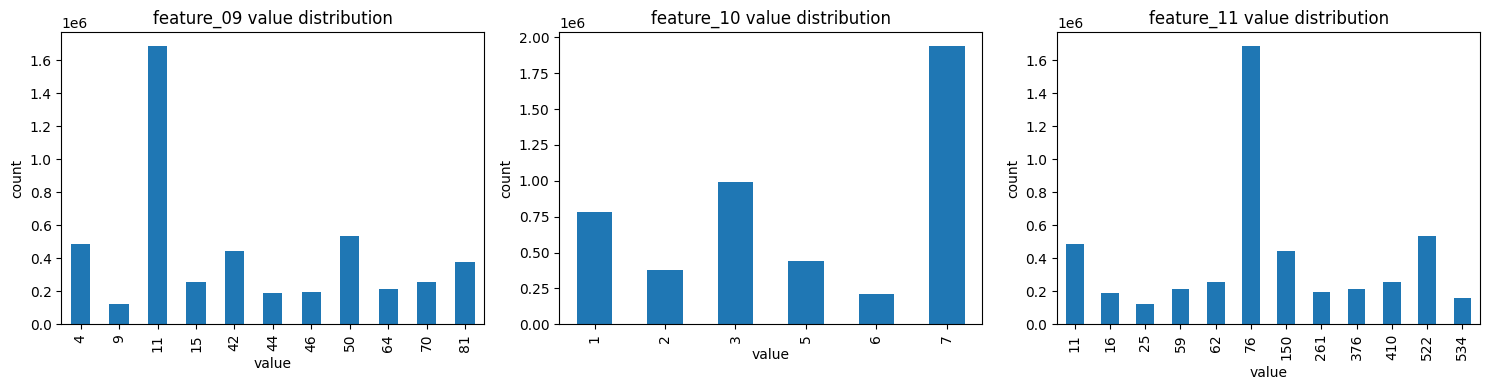

In [8]:
# potentially feature 9,10,11 
#could be discrete

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, col in zip(axes, ['feature_09', 'feature_10', 'feature_11']):
    sample_df[col].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f'{col} value distribution')
    ax.set_xlabel('value')
    ax.set_ylabel('count')

plt.tight_layout()
plt.show()

**These NaN values are making it hard to decide. Let's focus on a different partition.**

In [9]:
# Load a data from each file:
samples2 = []
for i in [5,6]:
    file_path = f"{path}/train.parquet/partition_id={i}/part-0.parquet"
    part = pd.read_parquet(file_path)
    samples2.append(part)
    
sample2_df = pd.concat(samples2, ignore_index=True) 

sample2_df

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,850,0,0,2.087724,-0.276877,-2.385324,-1.086325,0.049463,3.427029,-4.671824,0.054977,-0.259751,1.343003,11,7,76,-0.793587,2.523406,0.303231,NaN,0.523913,NaN,-1.567069,-0.965586,0.014156,-0.171976,1.015679,0.746074,-1.633316,-1.309486,0.965614,1.612443,0.823060,-0.027811,0.724840,-0.184198,NaN,NaN,-0.187675,-0.346574,-1.421471,0.093479,1.387856,NaN,1.254196,NaN,NaN,0.050192,NaN,-0.954613,2.004981,-1.557791,0.678891,-0.066386,NaN,2.456588,NaN,NaN,-1.159385,NaN,-0.889724,1.428067,NaN,0.817551,0.299599,0.352903,-0.328996,-0.151735,-0.224472,-1.477134,-1.643559,-0.556531,2.815019,0.356358,-0.527251,1.609195,0.076337,NaN,NaN,-0.228297,-0.273781,-0.277999,-0.295312,-0.346724,0.054874,-0.050004,0.803933,0.725200,0.141694,1.461546,0.779843,0.404129
1,850,0,1,3.752097,-0.168178,-2.161023,-0.511679,0.192425,3.162096,-4.386098,0.130385,-0.368283,1.913416,11,7,76,-0.660111,3.052153,0.071869,NaN,0.001913,NaN,-0.625688,-1.115230,0.185483,0.019226,1.916643,0.710887,-1.102333,-0.981141,0.521467,1.665925,1.461316,-0.358575,0.058004,0.021168,NaN,NaN,-0.641563,-0.482115,-2.396556,-0.121039,1.409137,NaN,0.932519,NaN,NaN,1.311157,NaN,-0.749923,1.793136,-2.108881,1.227915,-0.146708,NaN,0.888707,NaN,NaN,-1.427895,NaN,-1.575317,0.556004,NaN,0.321817,0.406464,0.352903,-0.388503,-0.100457,-0.201082,-1.926849,-1.763679,-0.612577,1.612830,-0.051637,-0.970520,2.794550,0.353143,NaN,NaN,-0.157027,-0.163802,-0.277016,-0.444008,-0.086088,0.056619,-0.396622,0.396958,1.208221,-1.016843,0.789595,1.251492,-1.701416
2,850,0,2,1.225099,-0.520426,-1.718115,-0.817358,-0.270528,3.314825,-2.578923,0.110200,-0.201740,2.072351,81,2,59,-0.528026,3.354508,0.327966,NaN,-0.215615,NaN,-1.260532,-2.043010,-1.314620,-0.239955,0.017958,-0.275870,-0.705935,-0.782762,0.268385,1.391267,1.265022,-0.539895,-0.351402,-0.209022,NaN,NaN,-0.164031,-0.517534,0.712620,0.418721,1.150448,NaN,-0.361983,NaN,NaN,-1.394171,NaN,-1.067848,0.734942,-2.053640,-1.888152,-0.688585,NaN,-0.588629,NaN,NaN,-2.212862,NaN,-2.015984,0.025982,NaN,-4.632971,-2.559358,0.352903,-0.316812,-0.264718,-0.248274,-1.383873,-2.433391,-0.728091,4.478824,0.497227,-0.449675,1.648489,-0.001233,NaN,NaN,-0.012737,-0.081892,-0.209053,-0.267447,0.636380,0.280909,1.168953,-2.395850,-1.057062,-3.009765,-2.848316,-0.974728,-5.000000
3,850,0,3,1.467042,-0.061985,-1.818735,-0.990254,0.274284,3.810929,-1.111770,0.043842,-0.090386,0.777759,4,3,11,-1.218813,1.769522,-0.076559,NaN,-0.461771,NaN,-1.905882,-2.141612,-0.347407,0.201398,0.629975,-0.282367,3.053007,2.292672,-0.312745,-0.370565,-0.473996,-0.535461,-0.979823,0.209806,NaN,NaN,-1.742934,-1.835673,1.511821,0.155715,0.446925,NaN,0.255243,NaN,NaN,-0.066129,NaN,-2.102276,1.224973,-0.932835,-0.402716,-0.369551,NaN,0.237087,NaN,NaN,-1.359047,NaN,-1.917404,1.456003,NaN,-1.652316,-0.545286,0.352903,-0.646065,-0.382810,-0.345414,-1.605209,-1.561482,-0.529622,1.397832,-0.131058,-0.717516,2.507538,0.020102,NaN,NaN,0.377517,0.284319,-0.067420,-0.157564,2.754708,0.792327,0.403978,-0.096906,-0.263321

In [10]:
# Unique values per column
for col in sample2_df.columns:
    if sample2_df[col].nunique() < 50: 
        nan_pct = sample2_df[col].isnull().mean() * 100
        print(f"{col}: {sample2_df[col].nunique()} unique | {nan_pct:.1f}% NaN")


symbol_id: 39 unique | 0.0% NaN
feature_09: 20 unique | 0.0% NaN
feature_10: 9 unique | 0.0% NaN
feature_11: 27 unique | 0.0% NaN


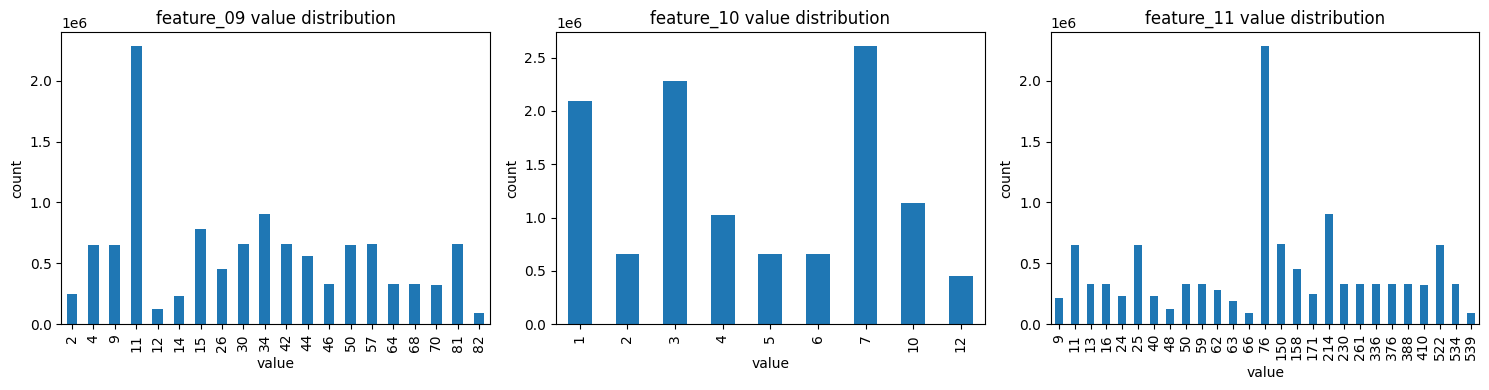

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, col in zip(axes, ['feature_09', 'feature_10', 'feature_11']):
    sample2_df[col].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f'{col} value distribution')
    ax.set_xlabel('value')
    ax.set_ylabel('count')

plt.tight_layout()
plt.show()

**Features 9,10 and 11** seem to be discrete. We should be careful later when we do rolling means etc for these. hmm



After some searching. Here is an observation made in [this notebok](https://www.kaggle.com/code/nicolesy/data-pre-processing-memory-and-missing-value?kernelSessionId=212462605): 

Here feature_10 may be classified data, because Unique values count and Max value are relatively small, such as financial indicator: Credit Rating Code. And the other two characteristics may be numeric meaning of integer financial indicators, such as: Volume, Number of Trades, Shares Outstanding.

In [12]:
"""
sample_df.groupby('date_id')['time_id'].nunique()   ## 849 points in a day
sample_df.groupby('date_id')['symbol_id'].nunique()   ## symbol_ids are changing with days
"""



"\nsample_df.groupby('date_id')['time_id'].nunique()   ## 849 points in a day\nsample_df.groupby('date_id')['symbol_id'].nunique()   ## symbol_ids are changing with days\n"

## NaN values

We had many NaN values. This is something to deal with. Let's focus on the first two partitions of the data.

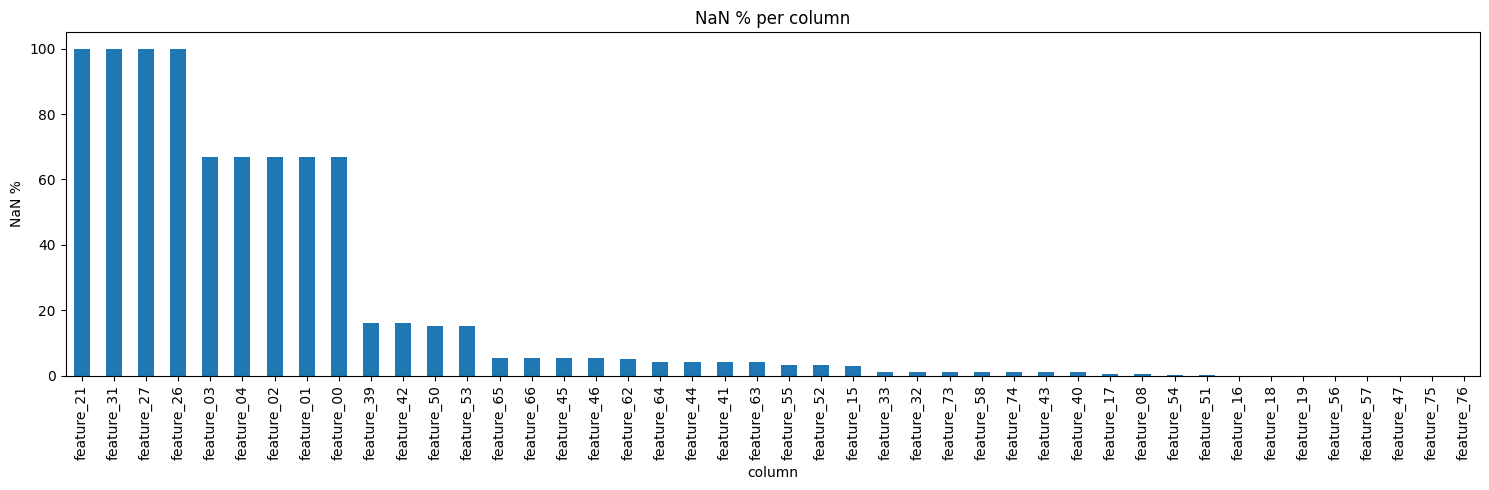

In [13]:
nan_pct = sample_df.isnull().mean() * 100
nan_pct = nan_pct[nan_pct > 0].sort_values(ascending=False)

plt.figure(figsize=(15, 5))
nan_pct.plot(kind='bar')
plt.title('NaN % per column')
plt.xlabel('column')
plt.ylabel('NaN %')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Let's check partitions in the middle. Sample2_df = partition 5 and 6

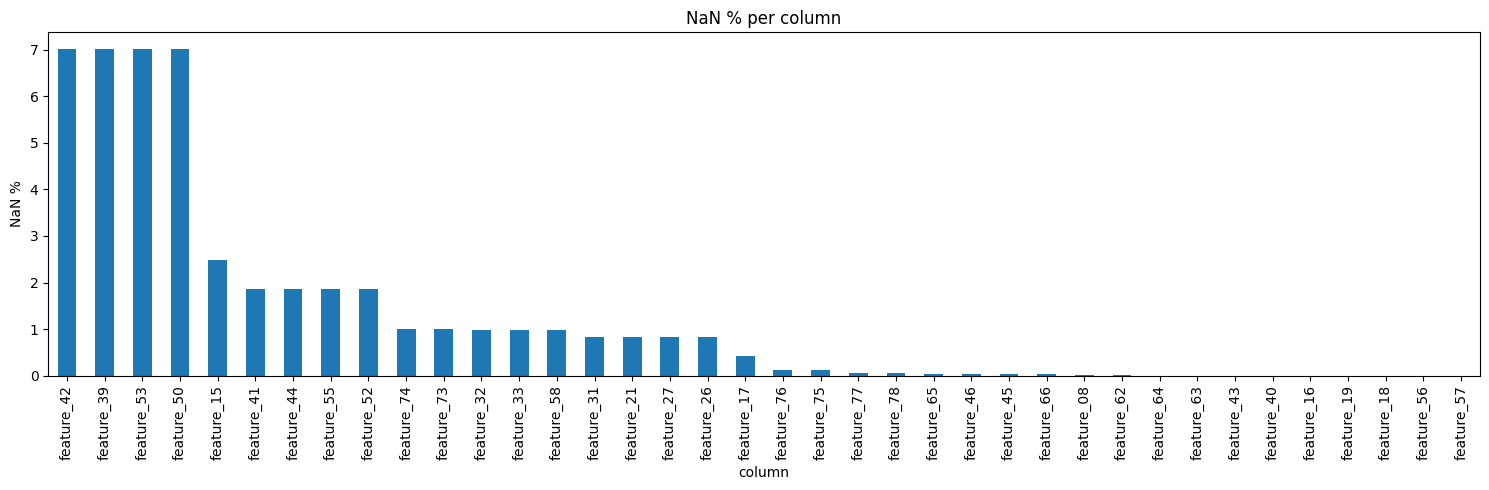

In [14]:
nan_pct2 = sample2_df.isnull().mean() * 100
nan_pct2 = nan_pct2[nan_pct2 > 0].sort_values(ascending=False)

plt.figure(figsize=(15, 5))
nan_pct2.plot(kind='bar')
plt.title('NaN % per column')
plt.xlabel('column')
plt.ylabel('NaN %')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

It seems like percentange of NaN are lot in the beginning but reducing later on. But there are NaN values present throughout mostly. 

## Evaluation metric (weights):

The weights matter for the evaluation. Should aim to get higher weighted (actually higher w_iy_i) observations correctly.

Some intial questions:
1. How are weights distributed ? 
2. Any patterns ? Are there certain symbols with higher weights ?

The high-weight rows (>4) are rare but disproportionately important for the score. The model needs to do well on those outlier-weight rows.



**1. Distribution of weights**

Let's check in the first two partitions

count    4.748457e+06
mean     1.909972e+00
std      1.033437e+00
min      4.405696e-01
25%      1.213389e+00
50%      1.689712e+00
75%      2.288223e+00
max      8.109553e+00
Name: weight, dtype: float64


<Axes: >

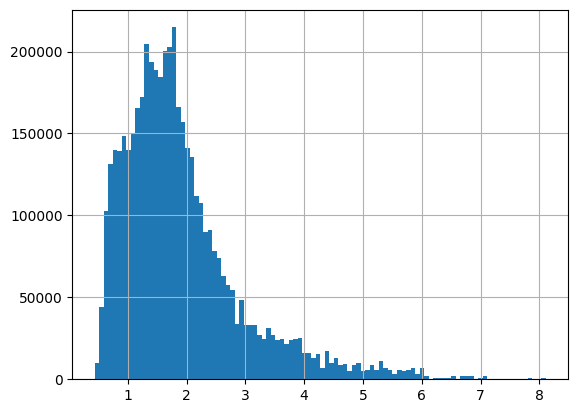

In [15]:
print(sample_df['weight'].describe())
sample_df['weight'].hist(bins=100)

Majority of them have smaller weights in the first two paritions. Let's focus on the middle partitions just to see if something changes.


count    1.155211e+07
mean     1.911850e+00
std      1.017208e+00
min      2.699185e-01
25%      1.206163e+00
50%      1.665498e+00
75%      2.398890e+00
max      1.024042e+01
Name: weight, dtype: float64


<Axes: >

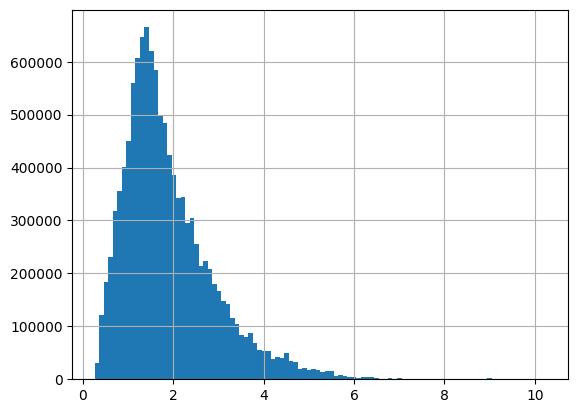

In [16]:
print(sample2_df['weight'].describe())
sample2_df['weight'].hist(bins=100)

Not much to change. It seems like weights overall are mostly small. Nothing crazy.

**2. Does weights change with symbols ?**

We will compare mean of weights for each symbol and see if there is any trend.

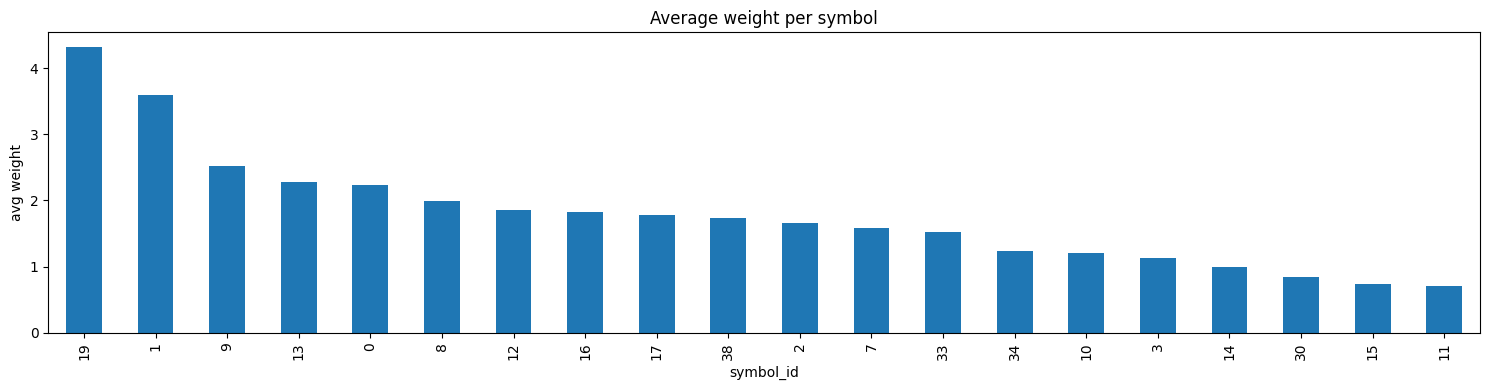

In [17]:
# Average weight per symbol
weight_per_symbol = sample_df.groupby('symbol_id')['weight'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 4))
weight_per_symbol.plot(kind='bar')
plt.title('Average weight per symbol')
plt.xlabel('symbol_id')
plt.ylabel('avg weight')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

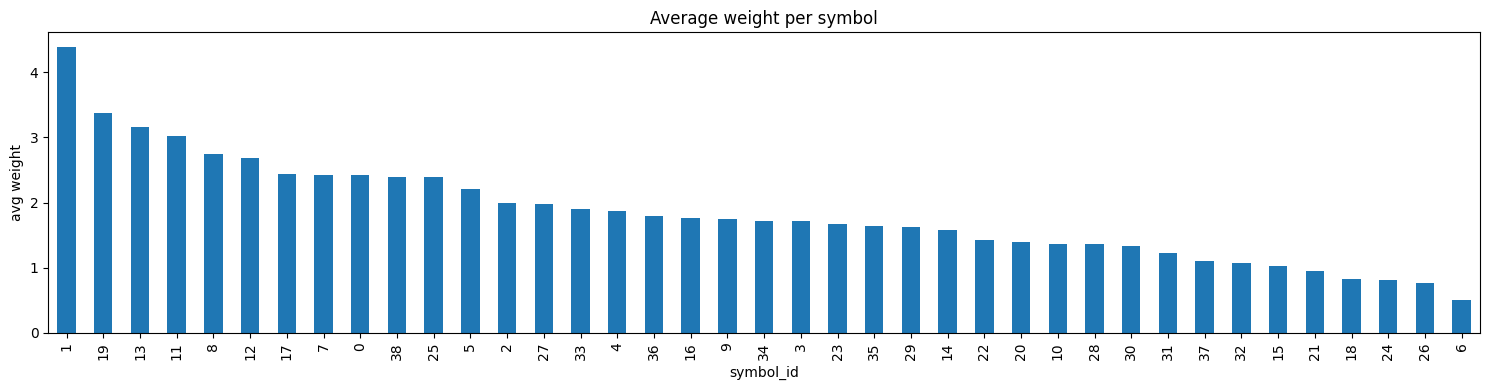

In [18]:
# Average weight per symbol
weight_per_symbol2 = sample2_df.groupby('symbol_id')['weight'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 4))
weight_per_symbol2.plot(kind='bar')
plt.title('Average weight per symbol')
plt.xlabel('symbol_id')
plt.ylabel('avg weight')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Symbols 1 , 9, 13 and 19** seem to have higher weights. They take up a big chunk of weight. 

**3. Do weights change with time ?**

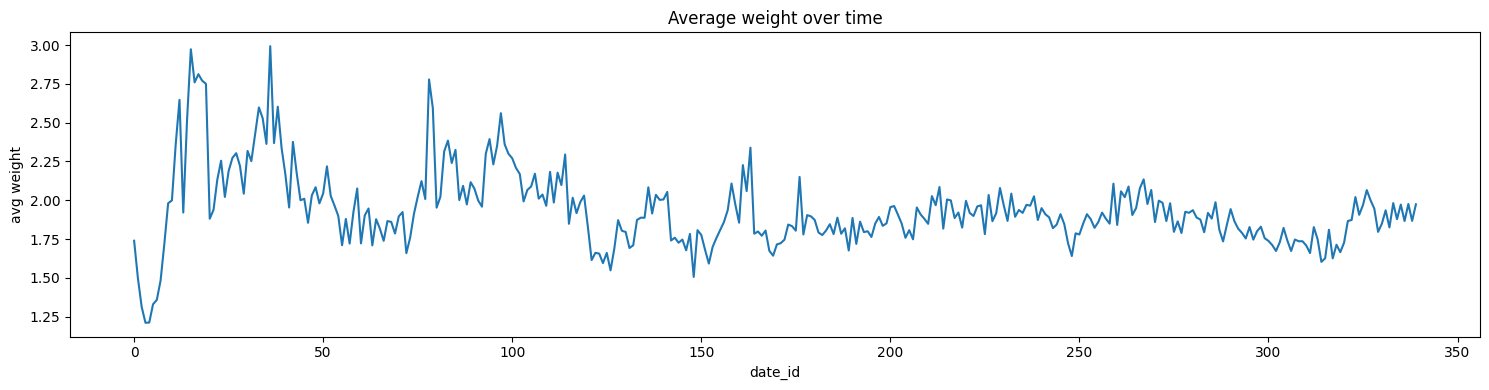

In [19]:
## first 2 partitions
weight_per_date = sample_df.groupby('date_id')['weight'].mean()

plt.figure(figsize=(15, 4))
weight_per_date.plot()
plt.title('Average weight over time')
plt.xlabel('date_id')
plt.ylabel('avg weight')
plt.tight_layout()
plt.show()

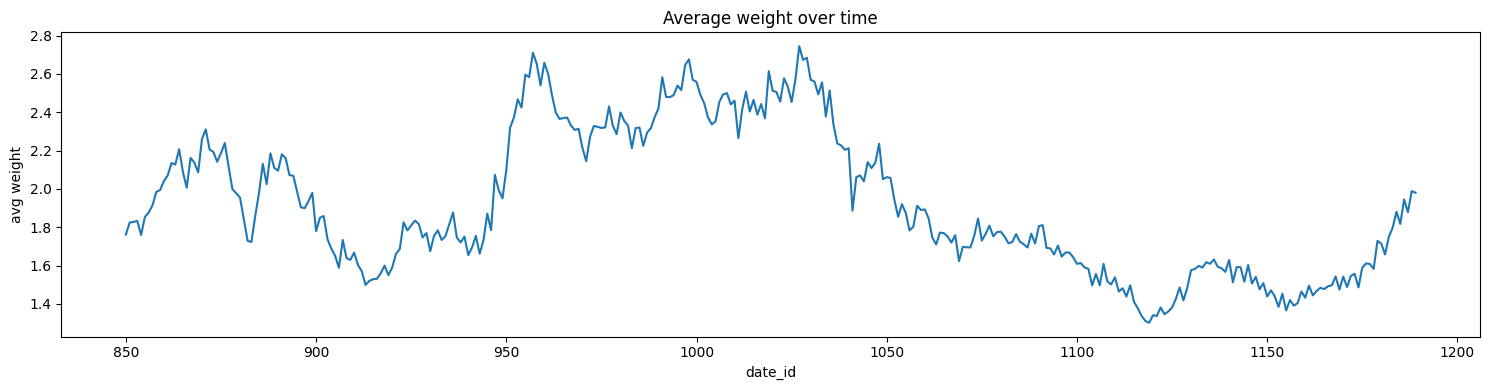

In [20]:
## middle partitions
weight_per_date2 = sample2_df.groupby('date_id')['weight'].mean()

plt.figure(figsize=(15, 4))
weight_per_date2.plot()
plt.title('Average weight over time')
plt.xlabel('date_id')
plt.ylabel('avg weight')
plt.tight_layout()
plt.show()

Nothing crazy at first sight. 

## Target: responder_6

Our goal is to predict responder_6. Let's get some idea about the responder_6 variable.

Some initial questions:
1. Some general plots and see how it behaves? returns?
2. Distribution of responder_6? Any highly correlated features?
3. What are other responders? Are they important? How to deal with or incorporate them into our model?
4. Responder behavior for different symbols. Any trends?
5. Autocorrelation in responder_6? Distribution shift over time? Symmetric around zero? Correlation with other responders?
6. Which features correlate most with responder_6? Do correlations stay stable over time? Redundant/correlated feature groups?



In [21]:
"""feature_cols = [f"feature_{i:02d}" for i in range(79)]sample_df[feature_cols].hist(bins=50, figsize=(30, 30))"""

'feature_cols = [f"feature_{i:02d}" for i in range(79)]sample_df[feature_cols].hist(bins=50, figsize=(30, 30))'

**1. Plots**

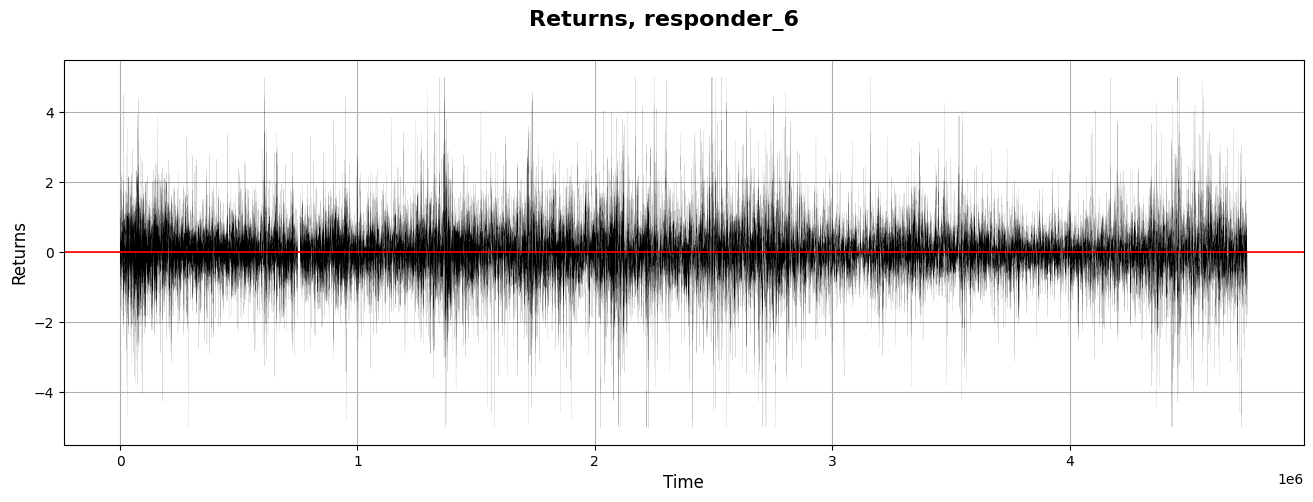

In [22]:
train =sample_df
train['N']=train.index.values 
train['id']=train.index.values 

xx= sample_df[(sample_df.symbol_id==1)] ['id']
yy=sample_df[ (sample_df.symbol_id==1)]['responder_6']

plt.figure(figsize=(16, 5))
plt.plot(xx,yy, color = 'black', linewidth =0.05)
plt.suptitle('Returns, responder_6', weight='bold', fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Returns", fontsize=12)
plt.grid( linewidth=0.8)
plt.axhline(0, color='red', linestyle='-', linewidth=1.2)
plt.show()


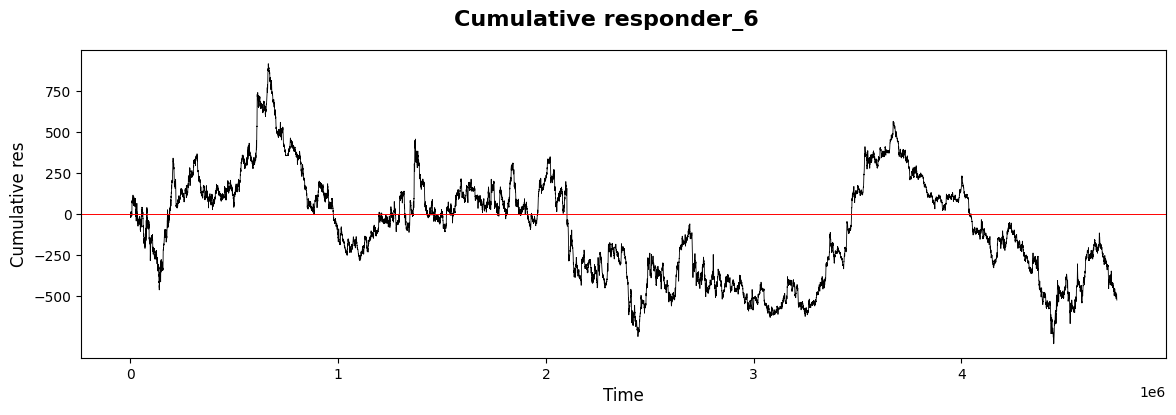

In [23]:
#symbol_id=1
plt.figure(figsize=(14, 4))
plt.plot(xx,yy.cumsum(), color = 'black', linewidth =0.6)
plt.suptitle('Cumulative responder_6', weight='bold', fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Cumulative res", fontsize=12)
plt.yticks(np.arange(-500,1000,250))
#plt.xticks(np.arange(0,170,10))
#plt.grid(color = 'lightblue')
plt.axhline(0, color='red', linestyle='-', linewidth=0.7)
plt.show()

Seems like it is returns. Let's look at distribution.

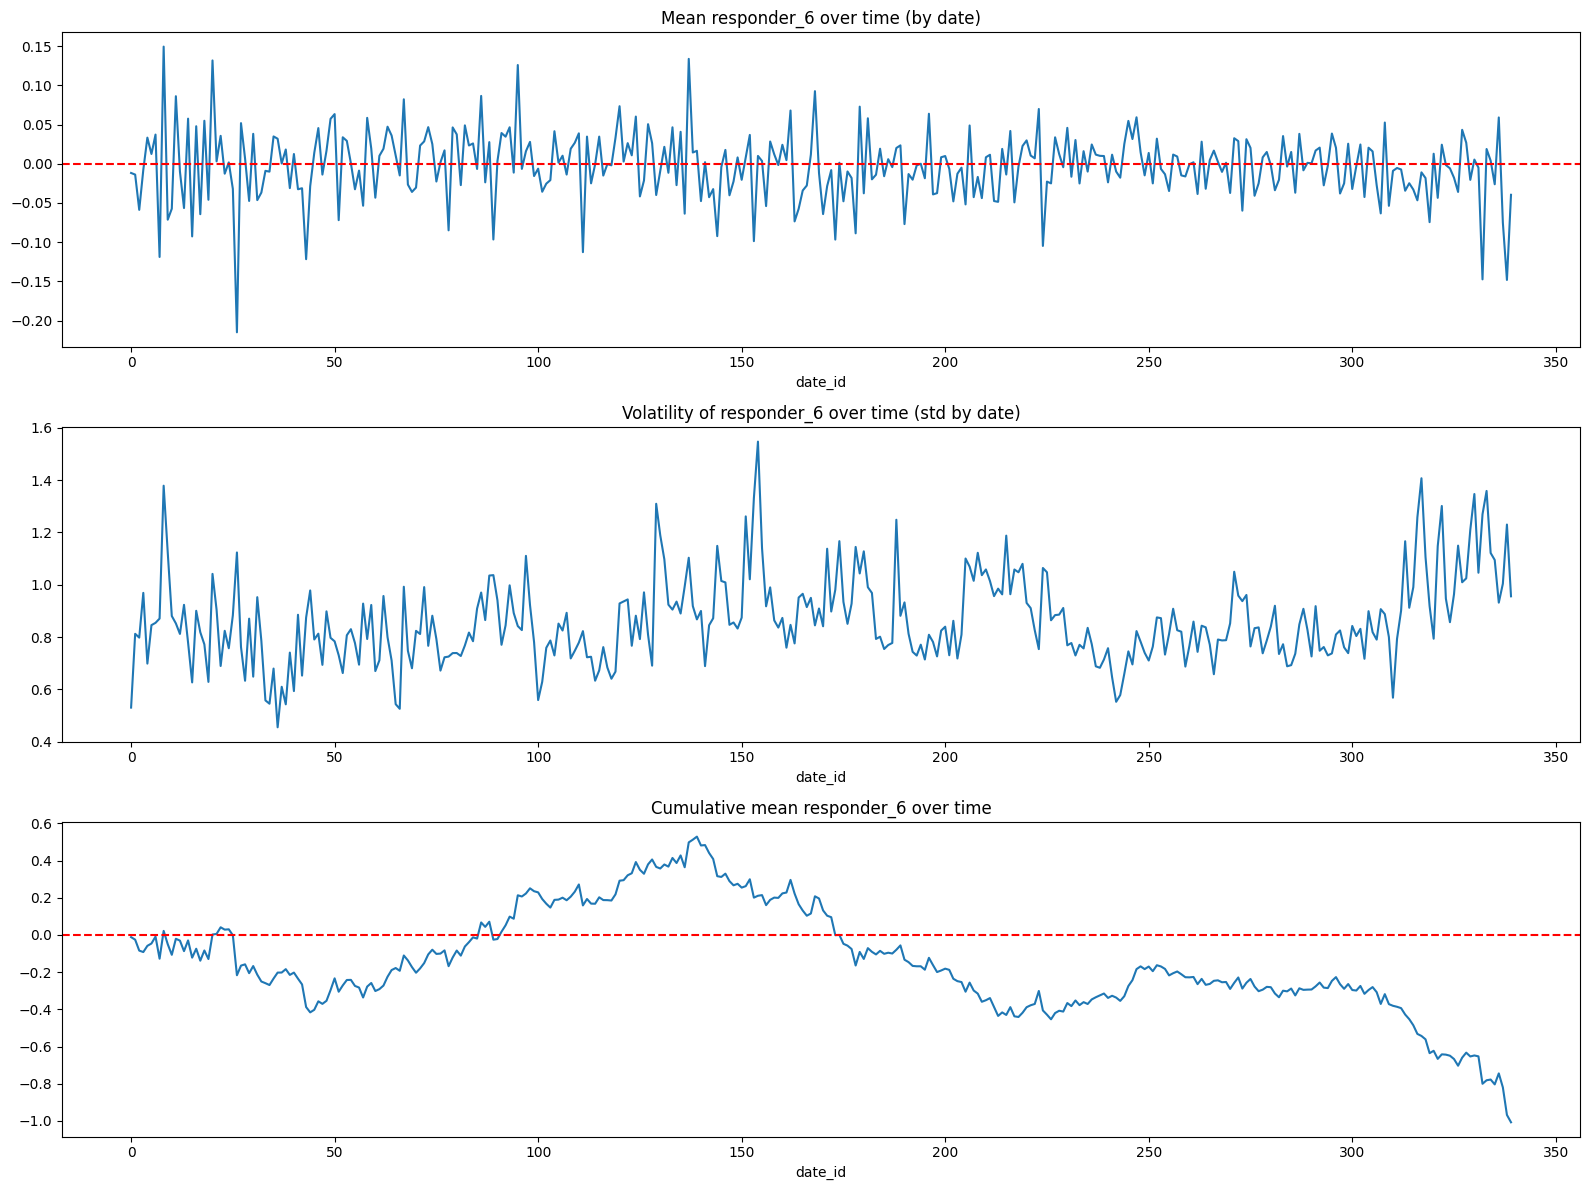

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Mean return over time (by date)
sample_df.groupby('date_id')['responder_6'].mean().plot(ax=axes[0])
axes[0].set_title('Mean responder_6 over time (by date)')
axes[0].axhline(0, color='red', linestyle='--')

# Volatility over time
sample_df.groupby('date_id')['responder_6'].std().plot(ax=axes[1])
axes[1].set_title('Volatility of responder_6 over time (std by date)')

# Cumulative mean return
sample_df.groupby('date_id')['responder_6'].mean().cumsum().plot(ax=axes[2])
axes[2].set_title('Cumulative mean responder_6 over time')
axes[2].axhline(0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

Mean return hovers around zero with some mild regime shifts — nothing crazy. 

**Question 2 — Distribution of responder_6 and highly correlated features**

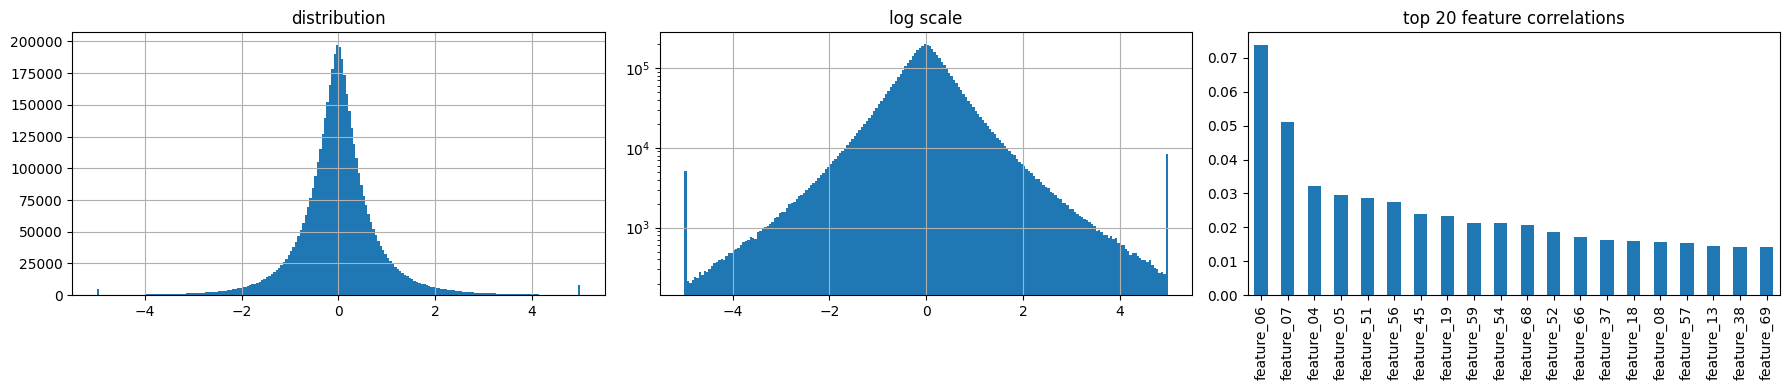

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sample_df['responder_6'].hist(bins=200, ax=axes[0])
sample_df['responder_6'].hist(bins=200, ax=axes[1], log=True)

feature_cols = [c for c in sample_df.columns if c.startswith('feature_')]
feat_corrs = sample_df[feature_cols].corrwith(sample_df['responder_6']).abs().sort_values(ascending=False)
feat_corrs.head(20).plot(kind='bar', ax=axes[2])

for ax, t in zip(axes, ['distribution', 'log scale', 'top 20 feature correlations']):
    ax.set_title(t)

plt.tight_layout()
plt.show()

Nothing crazy. There is almost zero signal (top correlation is 0.07). There might something if we segregate it based on the symbol. Will check later.

In [26]:
"""print(sample_df['responder_6'].describe())
print(f"Skewness: {sample_df['responder_6'].skew():.4f}")
print(f"Kurtosis: {sample_df['responder_6'].kurt():.4f}")
print(f"% positive: {(sample_df['responder_6'] > 0).mean():.2%}")"""

'print(sample_df[\'responder_6\'].describe())\nprint(f"Skewness: {sample_df[\'responder_6\'].skew():.4f}")\nprint(f"Kurtosis: {sample_df[\'responder_6\'].kurt():.4f}")\nprint(f"% positive: {(sample_df[\'responder_6\'] > 0).mean():.2%}")'

**Question 3 — Other responders: how correlated are they with responder_6?**

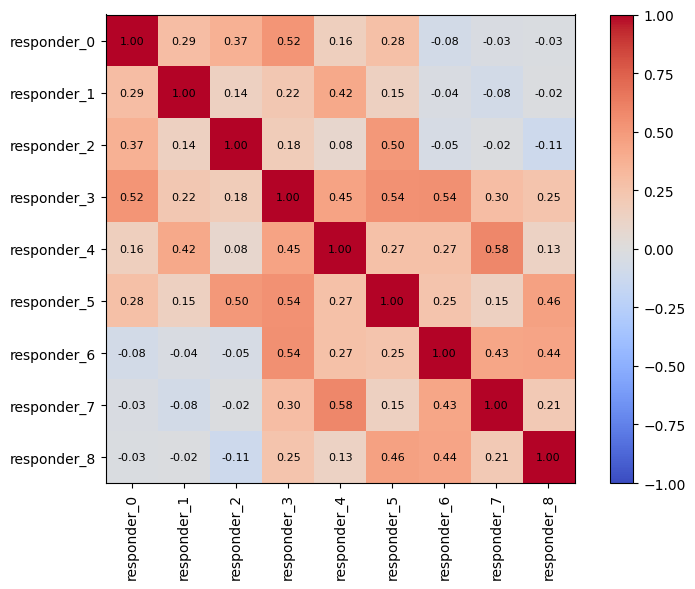

In [26]:
corr = sample_df[[c for c in sample_df.columns if c.startswith('responder_')]].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f'{corr.iloc[i,j]:.2f}', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

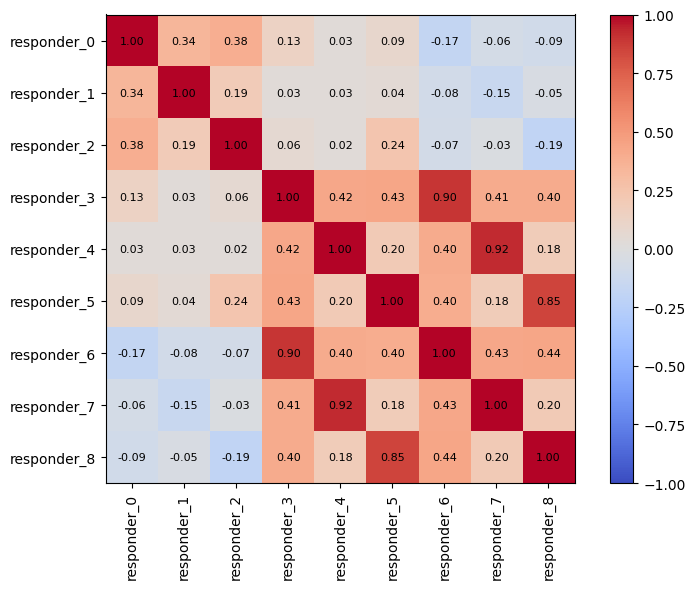

In [27]:
## middle partition 

corr2 = sample2_df[[c for c in sample2_df.columns if c.startswith('responder_')]].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr2, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr2)), corr2.columns, rotation=90)
plt.yticks(range(len(corr2)), corr2.columns)

for i in range(len(corr2)):
    for j in range(len(corr2)):
        plt.text(j, i, f'{corr2.iloc[i,j]:.2f}', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

responder_6 seems to be correlated with responder_3 and there is some correlation with responder_7 and responder_8. 

**One idea would be to use lagged resp_3,7,8 maybe. If there is some correlation signal there with future responder_6 then.**

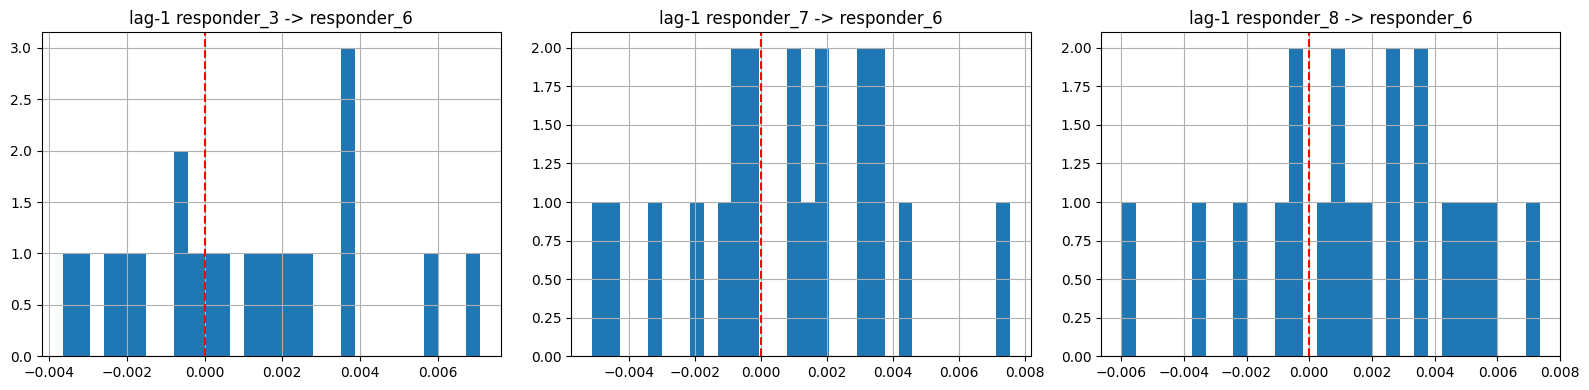

In [29]:
responder_cols_of_interest = ['responder_3', 'responder_7', 'responder_8']

# For each symbol, compute lag-1 correlation with responder_6
results = []
for sym in sample_df['symbol_id'].unique():
    df_sym = sample_df[sample_df['symbol_id'] == sym].sort_values('time_id')
    for col in responder_cols_of_interest:
        lag_corr = df_sym[col].shift(1).corr(df_sym['responder_6'])
        results.append({'symbol_id': sym, 'feature': col, 'lag_corr': lag_corr})

results_df = pd.DataFrame(results)

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for ax, col in zip(axes, responder_cols_of_interest):
    results_df[results_df['feature'] == col]['lag_corr'].hist(bins=30, ax=ax)
    ax.set_title(f'lag-1 {col} -> responder_6')
    ax.axvline(0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

Meh. Seems like there is nothing here. Pointless to use lagged ones. 

**Question 4 — Responder_6 behavior across different symbols**

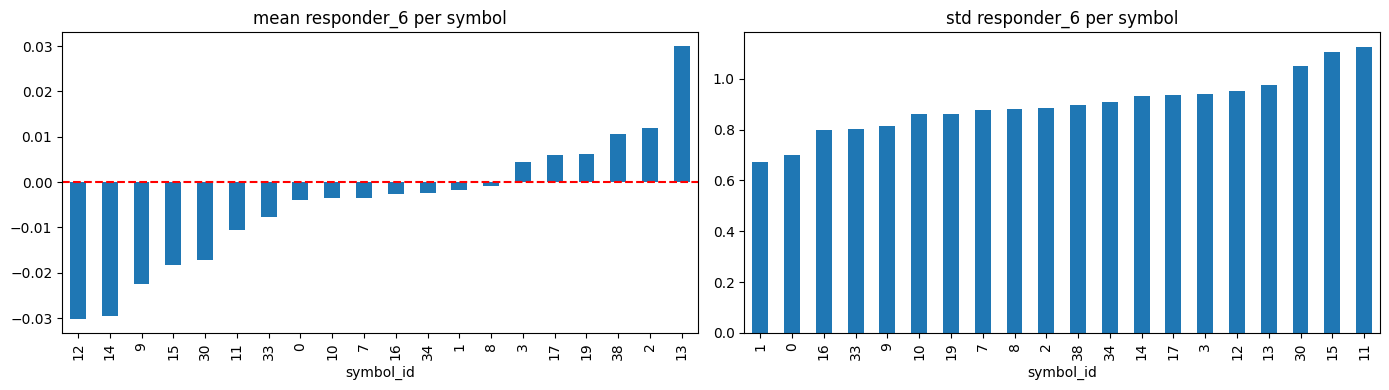

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sample_df.groupby('symbol_id')['responder_6'].mean().sort_values().plot(kind='bar', ax=axes[0])
axes[0].set_title('mean responder_6 per symbol')
axes[0].axhline(0, color='red', linestyle='--')

sample_df.groupby('symbol_id')['responder_6'].std().sort_values().plot(kind='bar', ax=axes[1])
axes[1].set_title('std responder_6 per symbol')

plt.tight_layout()
plt.show()

No particular trend. aahaga

**Question 5 — Autocorrelation, distribution shift, symmetry**

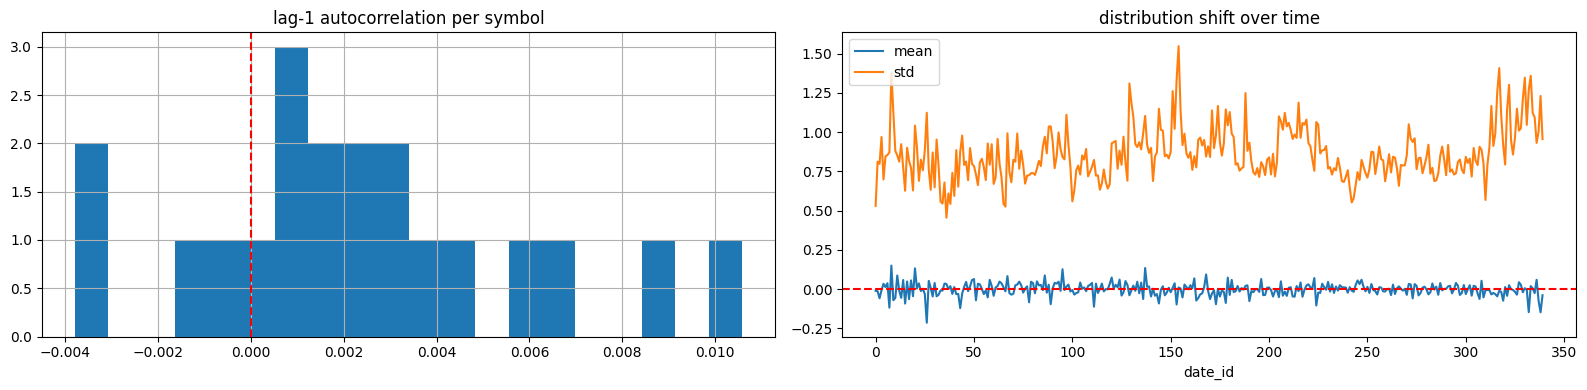

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Autocorrelation per symbol
autocorrs = [sample_df[sample_df['symbol_id']==s].sort_values('time_id')['responder_6'].autocorr(lag=1)
             for s in sample_df['symbol_id'].unique()]
pd.Series(autocorrs).hist(bins=20, ax=axes[0])
axes[0].axvline(0, color='red', linestyle='--')
axes[0].set_title('lag-1 autocorrelation per symbol')

# Distribution shift over time
sample_df.groupby('date_id')['responder_6'].mean().plot(ax=axes[1])
sample_df.groupby('date_id')['responder_6'].std().plot(ax=axes[1])
axes[1].axhline(0, color='red', linestyle='--')
axes[1].legend(['mean', 'std'])
axes[1].set_title('distribution shift over time')


plt.tight_layout()
plt.show()

Near-zero autocorrelation, mean =0, nearly symmetric, but some non-stationary. This is for lag1. May be higher lags something might come up.

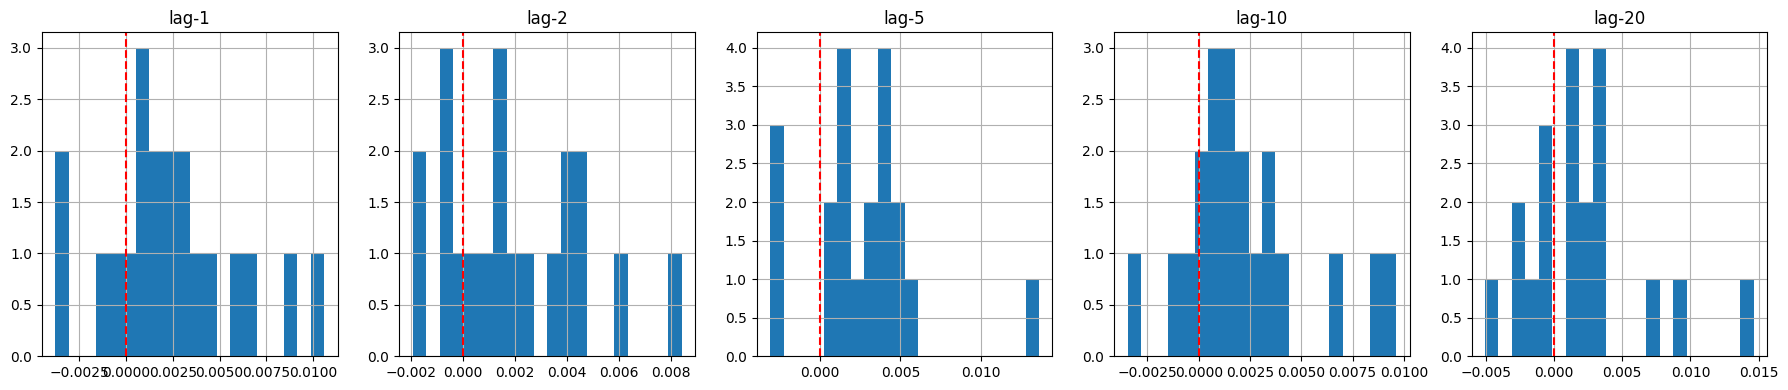

In [32]:
lags = [1, 2, 5, 10, 20]
fig, axes = plt.subplots(1, len(lags), figsize=(18, 4))

for ax, lag in zip(axes, lags):
    autocorrs = [sample_df[sample_df['symbol_id']==s].sort_values('time_id')['responder_6'].autocorr(lag=lag)
                 for s in sample_df['symbol_id'].unique()]
    pd.Series(autocorrs).hist(bins=20, ax=ax)
    ax.axvline(0, color='red', linestyle='--')
    ax.set_title(f'lag-{lag}')

plt.tight_layout()
plt.show()

question left earlier: any singal for specific signals ? mostly not but worth checking.

Randomly picking 20 symbols to see if there is something.

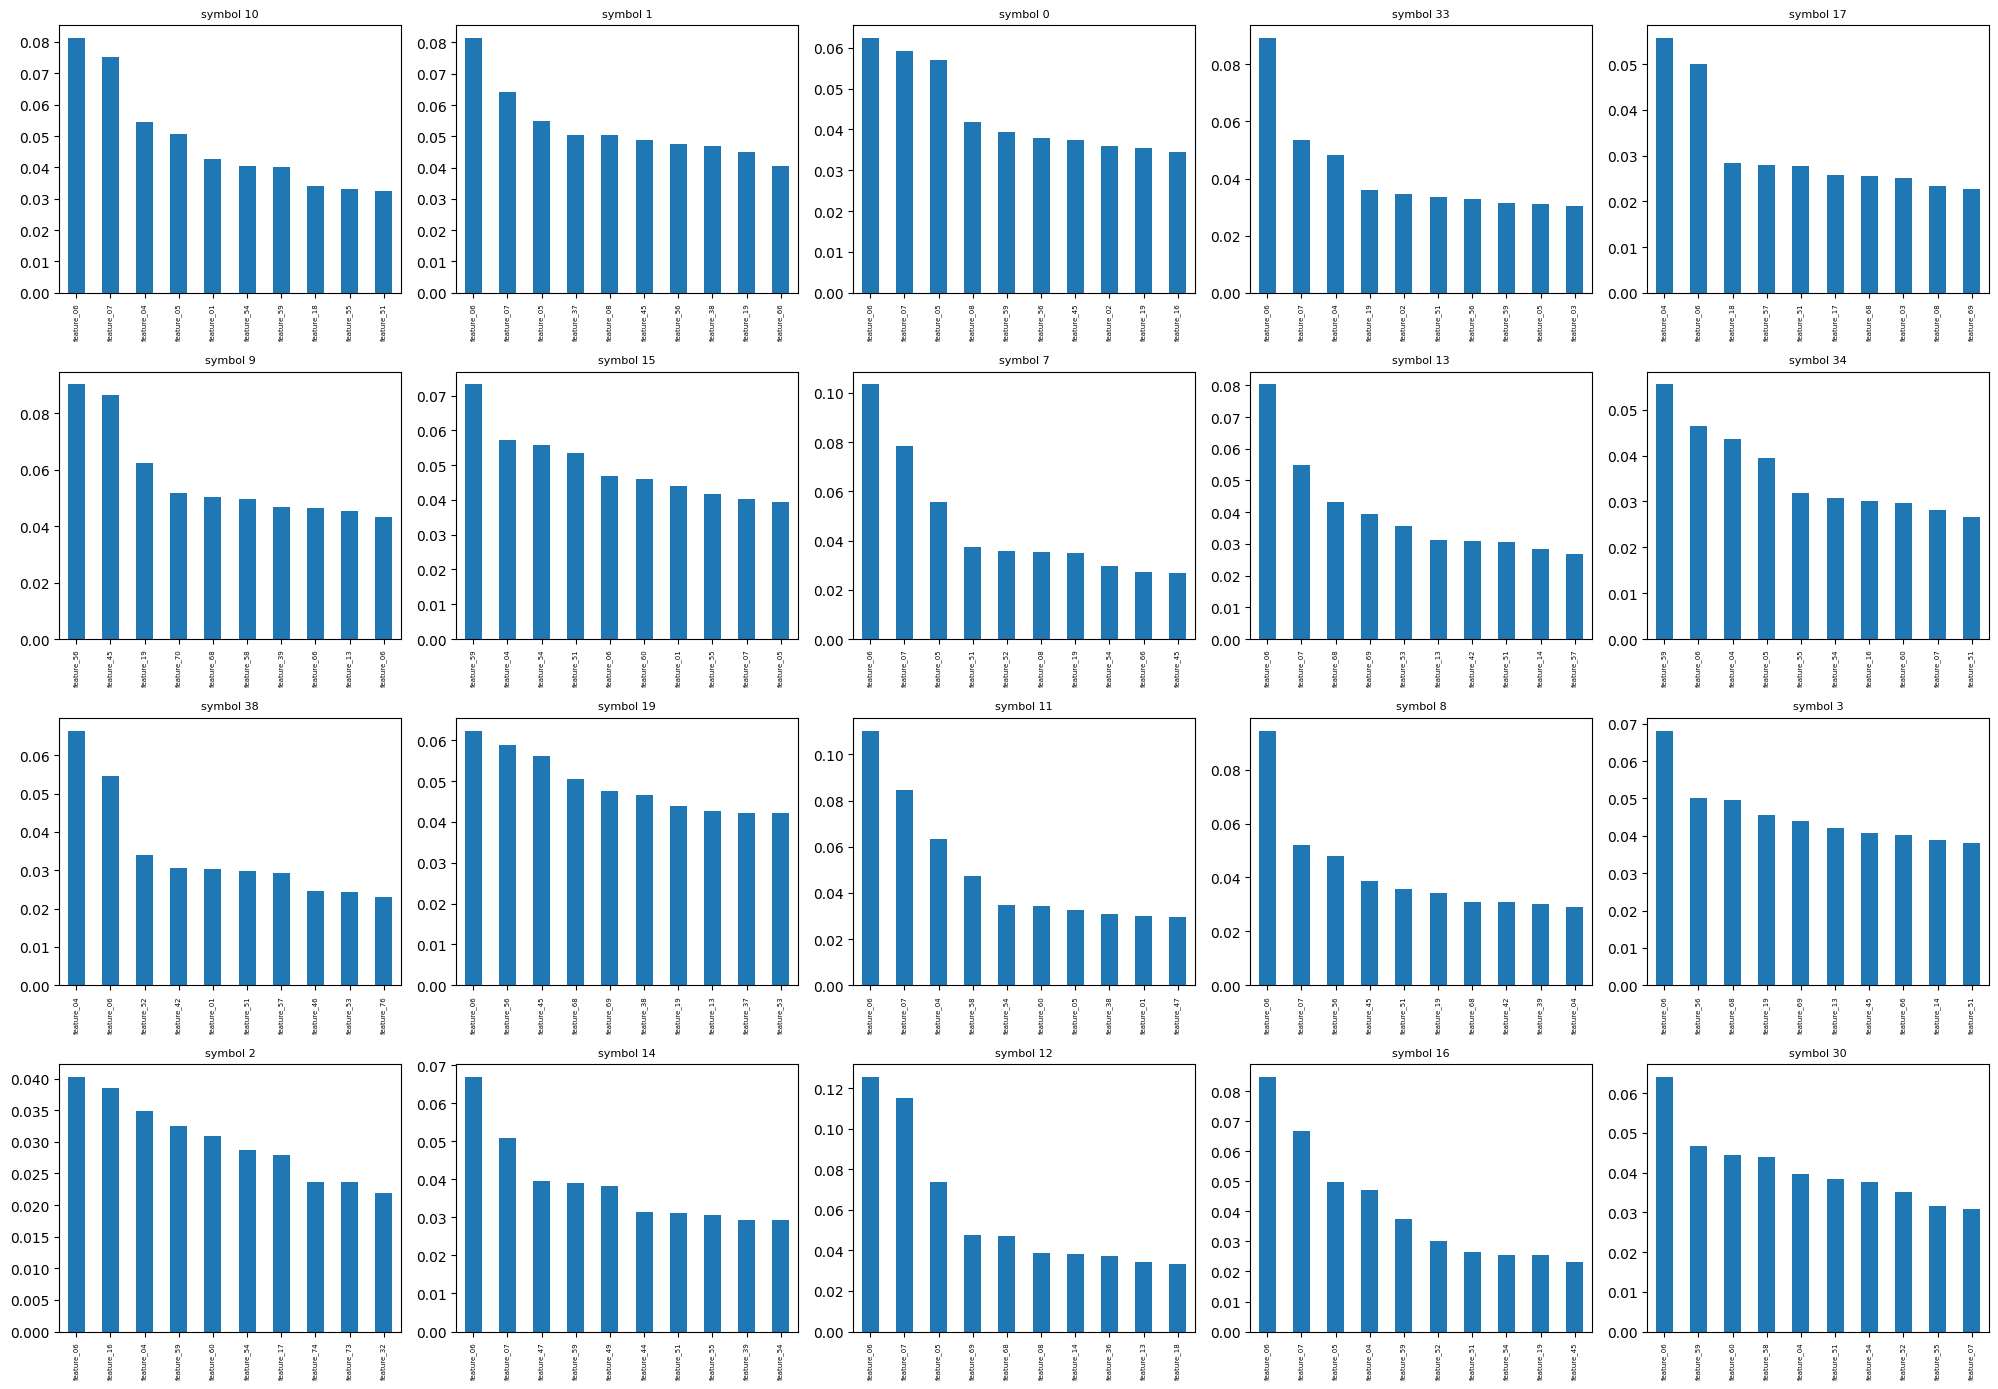

In [33]:
import random
random.seed(42)
syms = random.sample(list(sample_df['symbol_id'].unique()), 20)

fig, axes = plt.subplots(4, 5, figsize=(20, 14))

for ax, sym in zip(axes.flatten(), syms):
    df_sym = sample_df[sample_df['symbol_id'] == sym]
    corrs = df_sym[feature_cols].corrwith(df_sym['responder_6']).abs().sort_values(ascending=False)
    corrs.head(10).plot(kind='bar', ax=ax)
    ax.set_title(f'symbol {sym}', fontsize=8)
    ax.tick_params(axis='x', labelsize=5)

plt.tight_layout()
plt.show()

Nothing.

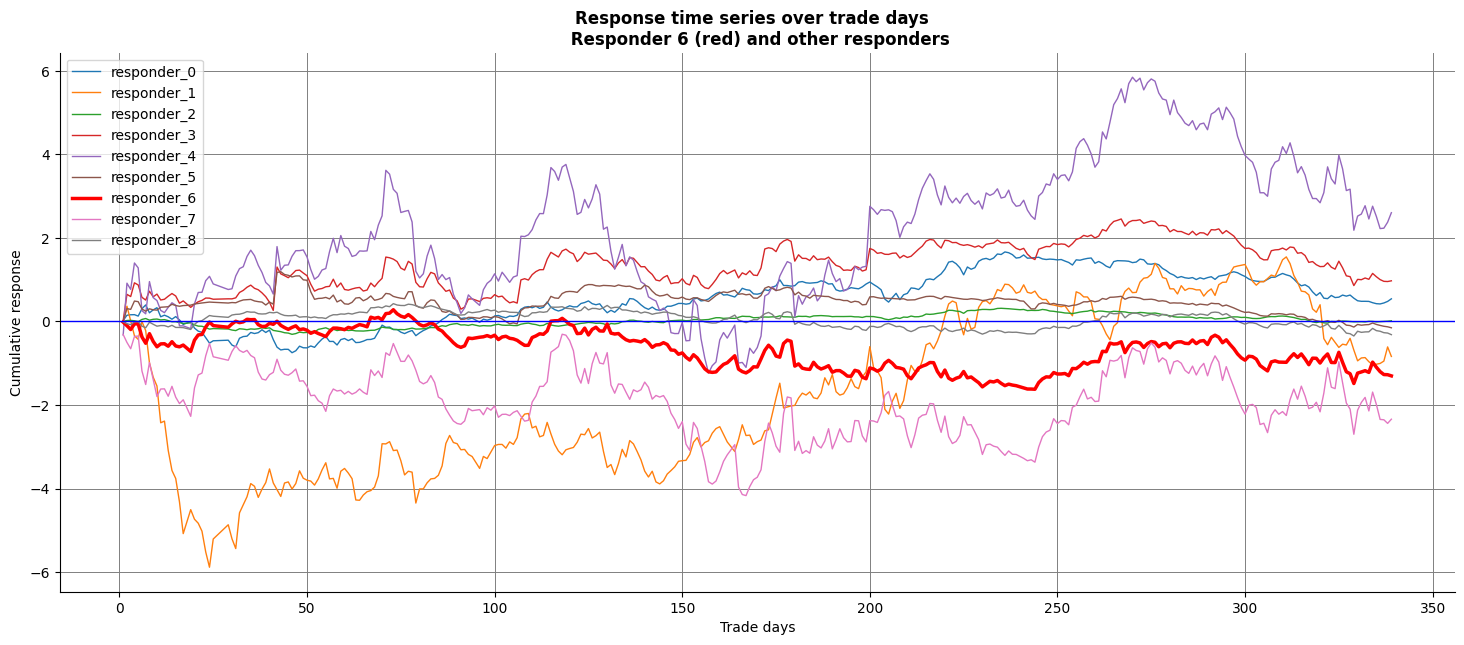

In [34]:
# for symbol_id == 0
gridColor = "grey"
plt.figure(figsize=(18, 7))
predictor_cols = [col for col in sample_df.columns if 'responder' in col]
for i in predictor_cols: 
    if i == 'responder_6': 
        c='red'
        lw=2.5
        plt.plot((sample_df[sample_df.symbol_id == 0].groupby(['date_id'])[i].mean()).cumsum(), linewidth = lw, color = c)
    else: 
        lw=1
        plt.plot((sample_df[sample_df.symbol_id == 0].groupby(['date_id'])[i].mean()).cumsum(), linewidth = lw)

plt.xlabel('Trade days')
plt.ylabel('Cumulative response')
plt.title('Response time series over trade days  \n Responder 6 (red) and other responders', weight='bold')
plt.grid(visible=True, color = gridColor, linewidth = 0.7)
plt.axhline(0, color='blue', linestyle='-', linewidth=1)
plt.legend(predictor_cols)
sns.despine()
#plt.show()






<br><br><br><br><br>





<br><br><br><br><br>





<br><br><br><br><br>

























**Features have tags that tell what kind of variables they are.** tag meanings are not known.

In [35]:
features = pd.read_csv(f"{path}/features.csv")
features

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tag_10,tag_11,tag_12,tag_13,tag_14,tag_15,tag_16
0,feature_00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,feature_01,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,True
2,feature_02,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,feature_03,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,feature_04,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,feature_74,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
75,feature_75,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
76,feature_76,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
77,feature_77,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False


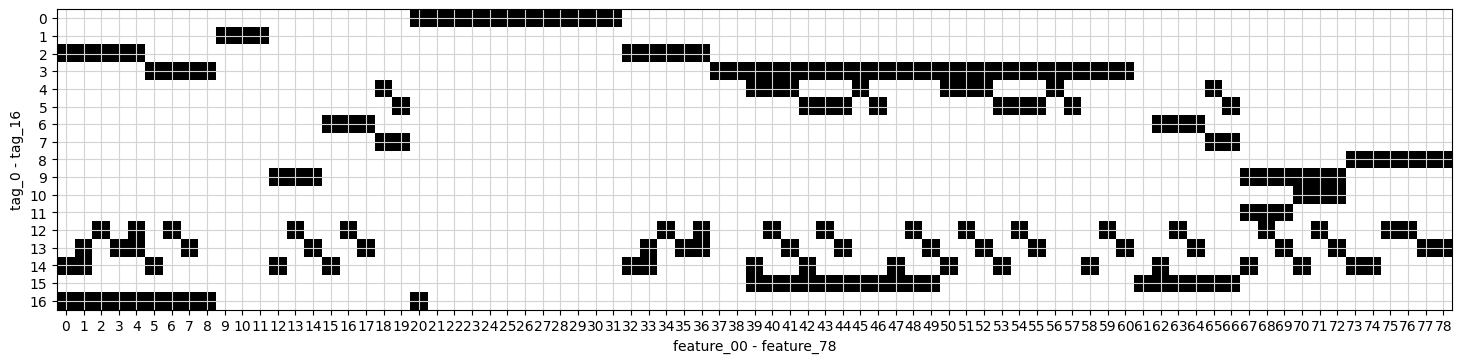

In [36]:
plt.figure(figsize=(18, 6))
plt.imshow(features.iloc[:, 1:].T.values, cmap="gray_r")
plt.xlabel("feature_00 - feature_78")
plt.ylabel("tag_0 - tag_16")
plt.yticks(np.arange(17))
plt.xticks(np.arange(79))
plt.grid(color = 'lightgrey')
plt.show()

In [37]:
print(features.columns.tolist())
features.head(10)

['feature', 'tag_0', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8', 'tag_9', 'tag_10', 'tag_11', 'tag_12', 'tag_13', 'tag_14', 'tag_15', 'tag_16']


,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tag_10,tag_11,tag_12,tag_13,tag_14,tag_15,tag_16
0,feature_00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,feature_01,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,True
2,feature_02,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,feature_03,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,feature_04,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True
5,feature_05,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
6,feature_06,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
7,feature_07,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True
8,feature_08,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
9,feature_09,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
features.set_index('feature').sum().sort_values(ascending=False)

tag_3     28
tag_13    20
tag_12    18
tag_14    18
tag_15    17
tag_0     12
tag_2     10
tag_4     10
tag_5     10
tag_16    10
tag_9      9
tag_6      6
tag_8      6
tag_7      4
tag_1      3
tag_11     3
tag_10     3
dtype: int64

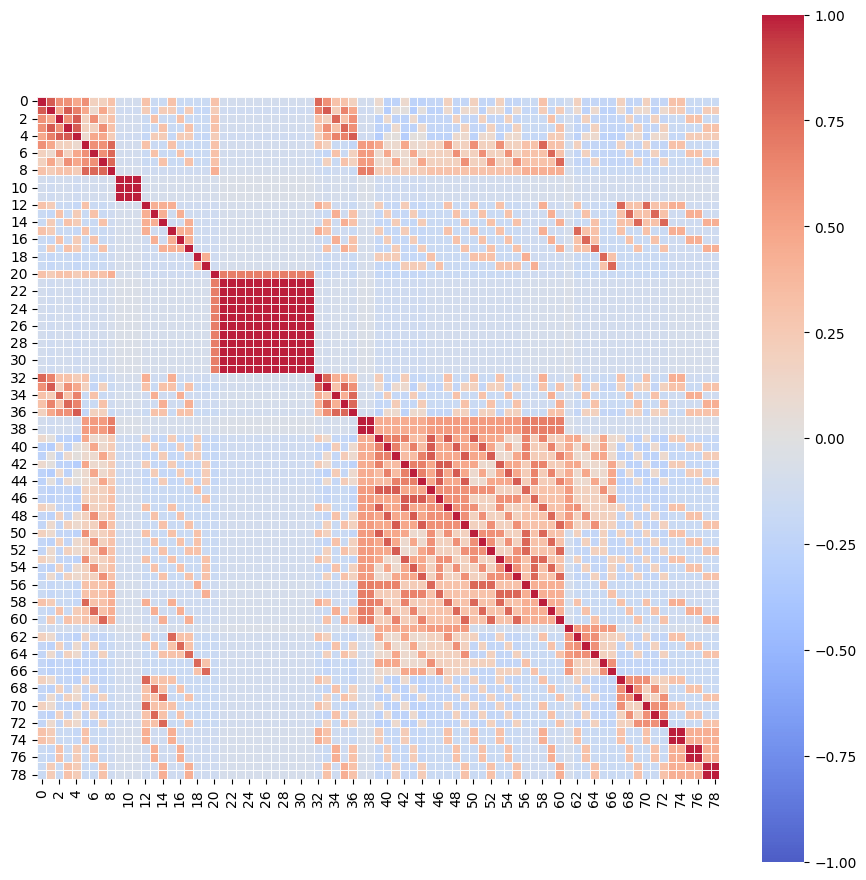

In [39]:

plt.figure(figsize=(11, 11))
matrix = features[[ f"tag_{no}" for no in range(0,17,1) ] ].T.corr()
sns.heatmap(matrix, square=True, cmap="coolwarm", alpha =0.9, vmin=-1, vmax=1, center= 0, linewidths=0.5, linecolor='white')
plt.show()

In [40]:
responders = pd.read_csv(f"{path}/responders.csv")
responders

,responder,tag_0,tag_1,tag_2,tag_3,tag_4
0,responder_0,True,False,True,False,False
1,responder_1,True,False,False,True,False
2,responder_2,True,True,False,False,False
3,responder_3,False,False,True,False,True
4,responder_4,False,False,False,True,True
5,responder_5,False,True,False,False,True
6,responder_6,False,False,True,False,False
7,responder_7,False,False,False,True,False
8,responder_8,False,True,False,False,False


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# Dealing with missing data

There seems to be lot of missing data. Some intial questions


1. What % of rows have at least one NaN? Which features have the most NaNs?
2. Are NaNs systematic (always missing for certain symbols/dates) or random? concentrated in early dates?
3. Are entire features missing for certain date ranges?
4. Does missingness correlate with the target — are NaN rows harder/easier to predict?

Earlier we only loaded some sample data. Doesn't tell much about the whole data. Getting some data from different partitions to check the nans.

In [ ]:
dfs = []
for i in range(10):
    df = pd.read_parquet(f'/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id={i}/part-0.parquet')
    dfs.append(df.sample(frac=0.1, random_state=42))  # 10% from each

sample_df = pd.concat(dfs).reset_index(drop=True)
print(sample_df.shape)

Rows with at least one NaN: 100.00%


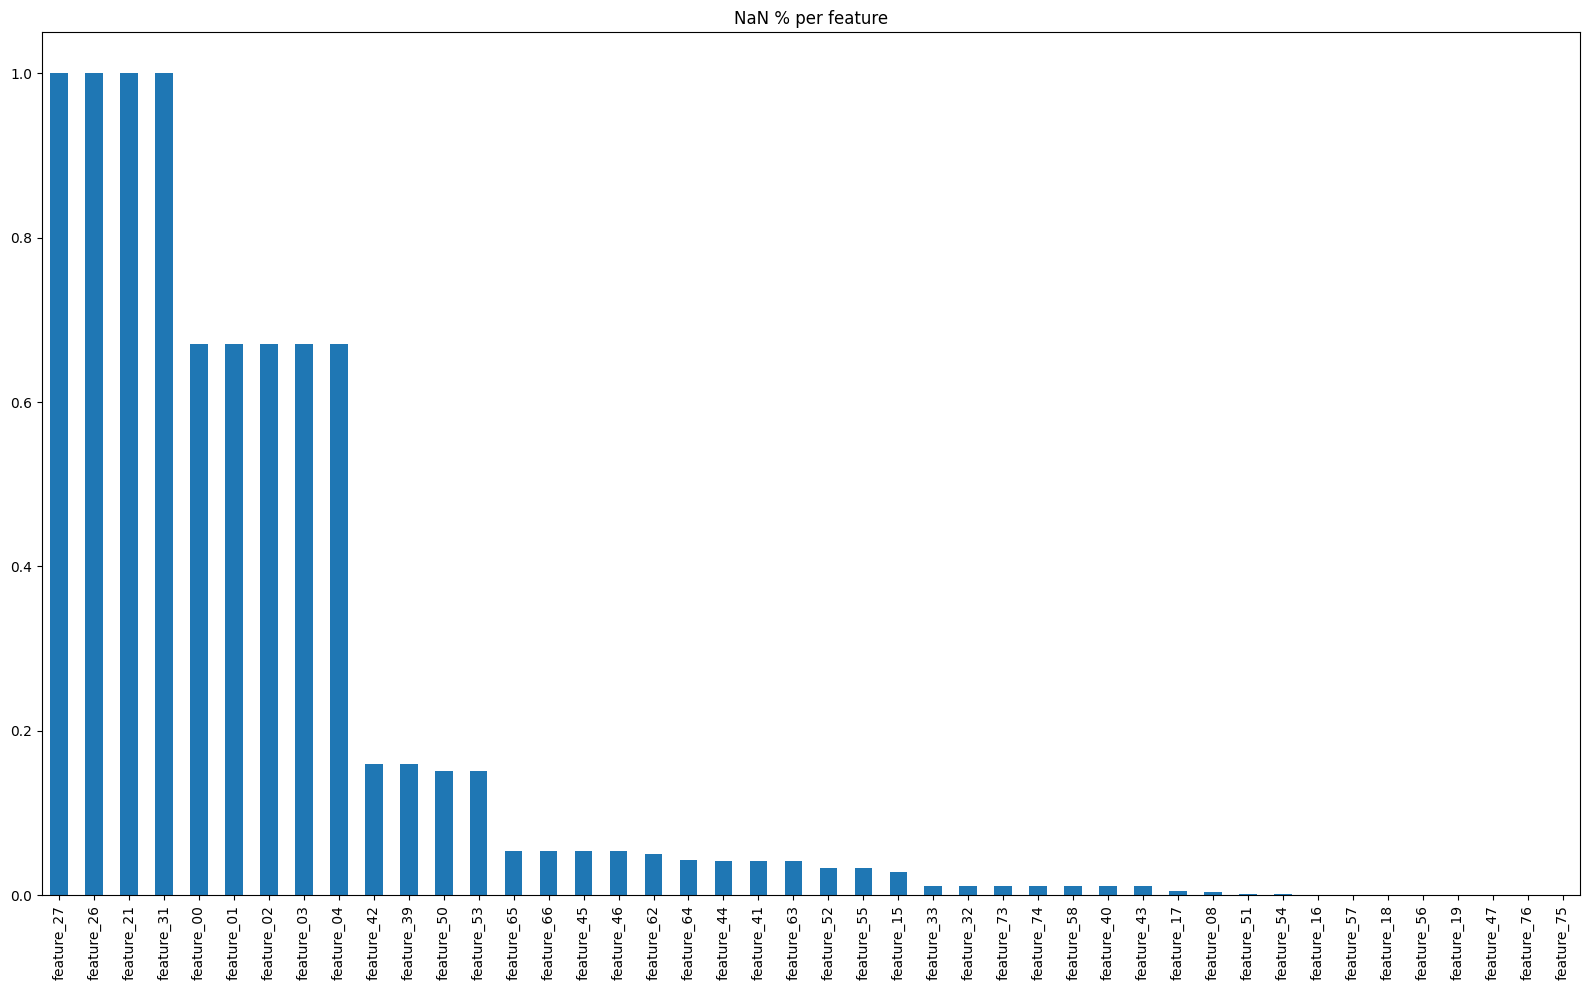

In [28]:

print(f"Rows with at least one NaN: {sample_df.isnull().any(axis=1).mean():.2%}")


null_pct = sample_df[feature_cols].isnull().mean().sort_values(ascending=False)
null_pct[null_pct > 0].plot(kind='bar', figsize=(16, 10), title='NaN % per feature')
plt.tight_layout()
plt.show()

earlier dates have lots of missing data like a lot. Dropping data for the first 250 days.

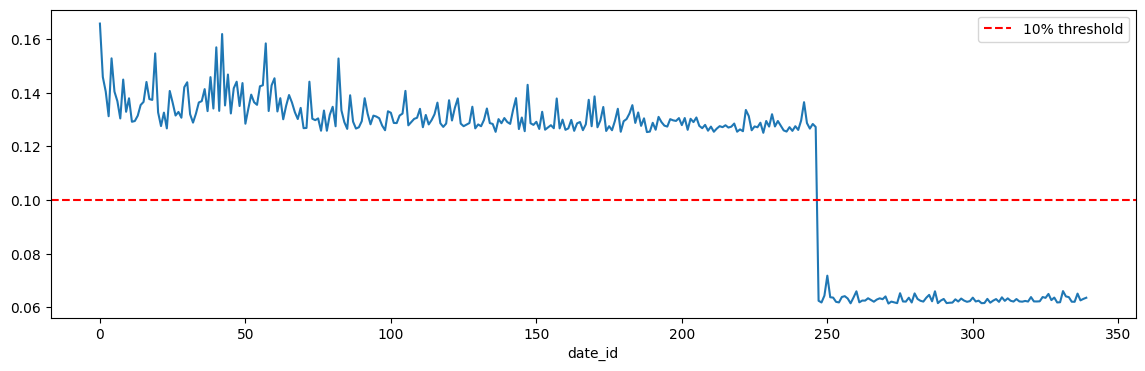

Cutoff date_id: 247


In [42]:
null_by_date = sample_df.groupby('date_id')[feature_cols].apply(lambda x: x.isnull().mean().mean())
null_by_date.sort_index().plot(figsize=(14, 4))
plt.axhline(0.1, color='red', linestyle='--', label='10% threshold')
plt.legend()
plt.show()

cutoff = null_by_date[null_by_date < 0.1].index[0]
print(f"Cutoff date_id: {cutoff}")

Cutoff date_id seems to 247. will use. 

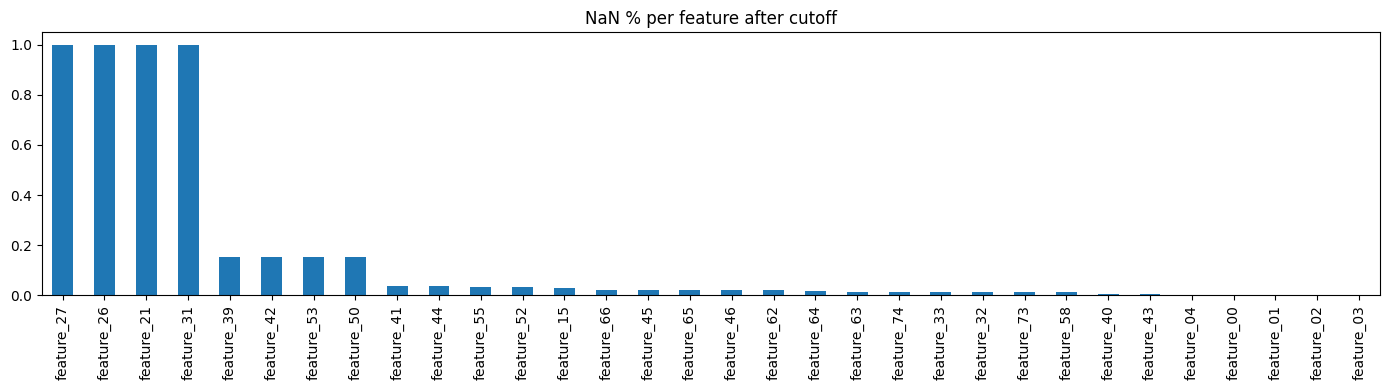

In [43]:
null_pct = sample_df[feature_cols].isnull().mean().sort_values(ascending=False)
high_nan_feats = null_pct[null_pct > 0.01].index.tolist()

post_cutoff = sample_df[sample_df['date_id'] >= 247]
post_cutoff[high_nan_feats].isnull().mean().sort_values(ascending=False).plot(kind='bar', figsize=(14, 4), title='NaN % per feature after cutoff')
plt.tight_layout()
plt.show()

In [44]:
pre = sample_df[sample_df['date_id'] < 247][feature_cols].isnull().mean()
post = sample_df[sample_df['date_id'] >= 247][feature_cols].isnull().mean()

pd.DataFrame({'pre': pre, 'post': post}).sort_values('post', ascending=False).head(20)

,pre,post
feature_27,1.000000,1.000000
feature_26,1.000000,1.000000
feature_21,1.000000,1.000000
feature_31,1.000000,1.000000
feature_39,0.162515,0.153317
feature_42,0.162515,0.153317
feature_53,0.150766,0.150766
feature_50,0.150766,0.150766
feature_41,0.045197,0.035592
feature_44,0.045197,0.035592


Still a lot of missing data. Without context, there doesn't seem like a sensible way to fill missing values. Plan is is to remove the time_id <= 247 and then fill the remaining missing data with zeros or median fill. 


After some tests with lightgbm for missing values, there is no drastic improvements filling with forward fill or filling zeros or median fill. Will fill missing values with zeros. 





# Summary

1. 39 symbols, 79 features, 9 responders, ~1600 date_ids
2. feature_09/10/11 categorical, feature_06/07 most predictive
3. responder_6: fat-tailed, symmetric, near-zero mean, non-stationary volatility
4. No autocorrelation at any lag
5. responder_3/7/8 correlated with responder_6, no lag signal
6. Weights dominated by symbols 1, 19, 13
7. Drop date_id < 247, fill NaNs with zero